# Jaccard index between truth shape and a segmentaiton pixel binary mask

This notebook illustrates the calculation of the Jaccard index between slums shape file (denoting the municipality ground truth for the slums in Kalyan, India) and the binary mask containing the slum segmentation result using `satsense` python library.

### Load truth shapefile from disk

In [1]:
# Python imports
import os
import numpy as np
# data paths
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality_made_valid.shp"

# masks full filenames
truth_shape_fullfname = os.path.join(TEST_SHAPE_PATH, slums_shape_fname)

print("Full truth shape filename: ", truth_shape_fullfname)

# Load the contents of the shapefiles as multipolygons
# satesense import
from satsense.util.shapefile import load_shapefile2multipolygon as sh2mul # loading shapefile to shapely multi-polygon

# get the data bounds
truth_multi, bounds = sh2mul(truth_shape_fullfname)
xmin, ymin, xmax, ymax = bounds
print("Data bounds: xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)

# From the bounds define the figure axes limits
offset = 100
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
print("Figure extent: ", extent)

# verify these are valid multipolygons
print("Truth slums multi-polygon valid?: ", truth_multi.is_valid)


Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_made_valid.shp
Data bounds: xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886
Figure extent:  (297228, 2123571, 300832, 2127939)
Truth slums multi-polygon valid?:  True


### Display the mutlipolygon

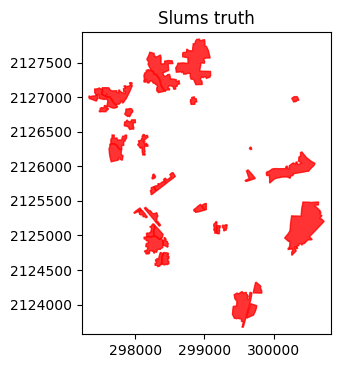

Figure extent:  (297228, 2123571, 300832, 2127939)


In [2]:
# Python and satsense imports

import matplotlib.pyplot as plt
%matplotlib inline
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons

# Visualization parameters
RED = '#FF0000'

offset = 100
show_verticies = False
alpha = 0.8

fig = plt.figure(1, dpi=100)
ax = fig.add_subplot(111)

shmp(truth_multi, ax, show_verticies, extent, RED, alpha, 'Slums truth')

plt.show()

print('Figure extent: ', extent)

### Load the segmentation result from the binary mask file

In [3]:
# satsense import
from satsense.util.mask import load_mask_from_file

# data paths and filenames
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Segmentation/'

ext = 'tif'
slum_mask_fname = 'slums_mask' + '.' + ext

result_slum_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, slum_mask_fname)

# load the mask
result_slum_mask = load_mask_from_file(result_slum_mask_fullfname)

print("Segmentation result slum was loaded from ", result_slum_mask_fullfname)

Segmentation result slum was loaded from  /home/elena/DynaSlum/Results/Segmentation/slums_mask.tif


### Display the result segmentation binary mask

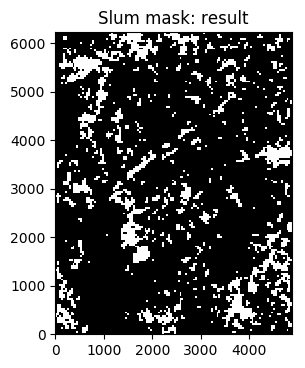

In [4]:
fig = plt.figure(1, dpi=100)
ax = fig.add_subplot(111)

result_mask = np.flip(result_slum_mask,0) # needed because of the way the mask was saved
ax.imshow(result_mask,cmap='gray', origin='lower')
ax.set_title('Slum mask: result')

plt.show()

### Convert the mask into a multipolygon

In [5]:
# satsense import
from satsense.util.conversions import mask2multipolygon as m2m

res = 0.6 # pixel resolution 60 cm
# get the data bounds of the original shape file to apply to the result
xmin, ymin, _, _ = bounds

t=(1.0*res, 0.0, 0.0+xmin, 0.0, 1.0*res, 0.0+ymin) # shift world coordinates and scale pixel resolution
conn4 = 4

# convert mask to multipo
result_multi = m2m(result_slum_mask, result_mask, t, conn4);

print("The segmentation result was converted to a valid multi-polygon?", result_multi.is_valid)
print("Bounds of the multipolygon: ", result_multi.bounds)


Self-intersection at or near point 297352.6765506615 2125351.144477916


Not a valid polygon, using its buffer!
The segmentation result was converted to a valid multi-polygon? True
Bounds of the multipolygon:  (297328.6765506615, 2123671.144477916, 300251.8765506615, 2127404.9444779158)


### Display the converted multipolygon

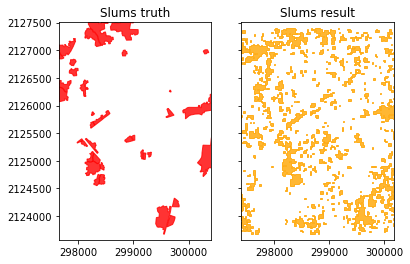

In [6]:
# Visualization parameters
ORANGE = '#FFA500'
RED = '#FF0000'

offset = 100
show_verticies = False
alpha = 0.8

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

shmp(truth_multi, ax1, show_verticies, extent, RED, alpha, 'Slums truth')

xmin, ymin, xmax, ymax = result_multi.bounds
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset

shmp(result_multi, ax2, show_verticies, extent, ORANGE, alpha, 'Slums result')

plt.show()

### Compute the Jaccard index between the 2 multipolygons

In [7]:
# Satsense package import
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim # jaccard index computation
  
# compute the Jaccard index (defined as intersection/union)
print("The Jaccard index between the 2 multi-polygons is ", jim(truth_multi, result_multi))

The Jaccard index between the 2 multi-polygons is  0.21783599944574986
